[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)

# CAMS Global Atmospheric Composition Forecast Practical

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/2025-cams-itineris-training/main?labpath=cams-global-analysis_aod_europe_2024.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/2025-cams-itineris-training/blob/main/cams-global-analysis_aod_europe_2024.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/2025-cams-itineris-training/blob/main/cams-global-analysis_aod_europe_2024.ipynb)

## Learning objectives

- In this practical exercise you will learn how to download CAMS Global Atmospheric Composition Forecast data programmatically using the Application Programming Interface (API) of the Atmosphere Data Store (ADS).
- You will also learn how to read the data into a Python object and explore its characteristics, including data dimensions, units, etc.
- You will then visualise static and animated maps of forecast data for CAMS Total Aerosol Optical Depth at 550nm showing transport of Saharan dust and Canadian wildfire smoke across the North Atlantic Ocean between 1 - 31 August 2024.
- Finally, you will plot a time series of the same data, but for a specific grid cell over Oslo, Norway.

This practical session is based on real events that are reported in a news article on the [Boreal summer 2024](https://atmosphere.copernicus.eu/cams-air-boreal-summer-24) and in an article on [Canadian wildfires in August 2024 and smoke transport to Europe](https://atmosphere.copernicus.eu/smoke-canadian-wildfires-reaches-europe).

## Initial setup

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the Atmosphere Data Store (ADS), intalling any other packages not already installed, setting up our ADS API credentials and importing the various Python libraries that we will need.

In [1]:
# Ensure that the cdsapi package is installed
!pip install -q cdsapi

In [2]:
# If you are running this notebook in Colab, uncomment the line below and run this cell.
#!pip install cartopy

### Add your ADS API credentials

To set up your ADS API credentials, please login/register on the [ADS](https://ads.atmosphere.copernicus.eu/), then you will see your [unique API key here](https://ads.atmosphere.copernicus.eu/how-to-api). 

You can add this API key to your current session by replacing `#########` in the code cell below with your API key.

In [ ]:
URL = 'https://ads.atmosphere.copernicus.eu/api'
KEY = '#############################################'

### Import libraries

In [1]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries to assist with animation and visualisations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [2]:
DATADIR = '.'

## Explore and download data

Visit the download form for the CAMS global forecast data https://ads-beta.atmosphere.copernicus.eu/datasets/cams-global-atmospheric-composition-forecasts?tab=download. View the parameters in the API script in the following cell and select the corresponding options. 

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which should be identical to the code cell below.

**Please remember to accept the terms and conditions at the bottom of the download form.**


### Download data

With the API request copied into the cell below, running this cell will retrieve and download the data you requested into your local directory.

In [3]:
dataset = "cams-global-atmospheric-composition-forecasts"
request = {
    'variable': ['total_aerosol_optical_depth_550nm','dust_aerosol_optical_depth_550nm'],
    'date': ['2024-03-20/2024-03-31'],
    'time': ['00:00','12:00'],
    'leadtime_hour': ['0'],
    'type': ['forecast'],
    'data_format': 'netcdf'
}

#client = cdsapi.Client(url=URL, key=KEY)
client = cdsapi.Client()
client.retrieve(dataset, request).download(f'{DATADIR}/total-aod-550nm-global-forecast-mar2024.nc')

2025-01-28 22:29:24,617 INFO Request ID is 528cf22d-f944-4773-a1af-3967e35b6a41
2025-01-28 22:29:24,693 INFO status has been updated to accepted
2025-01-28 22:29:33,379 INFO status has been updated to running
2025-01-28 22:29:57,671 INFO status has been updated to successful


'./total-aod-550nm-global-forecast-mar2024.nc'

## Inspect data

In [4]:
# Path to the downloaded file
netcdf_file = f'{DATADIR}/total-aod-550nm-global-forecast-mar2024.nc'

# Create Xarray Dataset
ds = xr.open_dataset(netcdf_file)

# view the dataset
ds

<xarray.Dataset>
Dimensions:                  (forecast_period: 1, forecast_reference_time: 24,
                              latitude: 451, longitude: 900)
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2024-03...
  * latitude                 (latitude) float64 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude                (longitude) float64 0.0 0.4 0.8 ... 359.2 359.6
Data variables:
    valid_time               (forecast_reference_time, forecast_period) datetime64[ns] ...
    aod550                   (forecast_period, forecast_reference_time, latitude, longitude) float32 ...
    duaod550                 (forecast_period, forecast_reference_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-28T21:29 GRIB to CDM+CF via cfgrib-0.9.1...

In [21]:
# create xarray data array object (single variable)
da = ds['duaod550']
da

<xarray.DataArray 'duaod550' (forecast_period: 1, forecast_reference_time: 24,
                              latitude: 451, longitude: 900)>
[9741600 values with dtype=float32]
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2024-03...
  * latitude                 (latitude) float64 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude                (longitude) float64 0.0 0.4 0.8 ... 359.2 359.6
Attributes: (12/34)
    GRIB_paramId:                             210209
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      405900
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    long_name:                                Dust Aerosol Optical Depth at 5...
    units:                                    ~
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0
    coordinates:                              step time latitude longitude va...

## Plot global map of forecast

### Define time step

In [22]:
time_step = 0

In [23]:
lead_times = da['forecast_reference_time']
forecast_day = str(lead_times[time_step].to_numpy())[:10]
forecast_day

'2024-03-20'

### Plot map for given time step

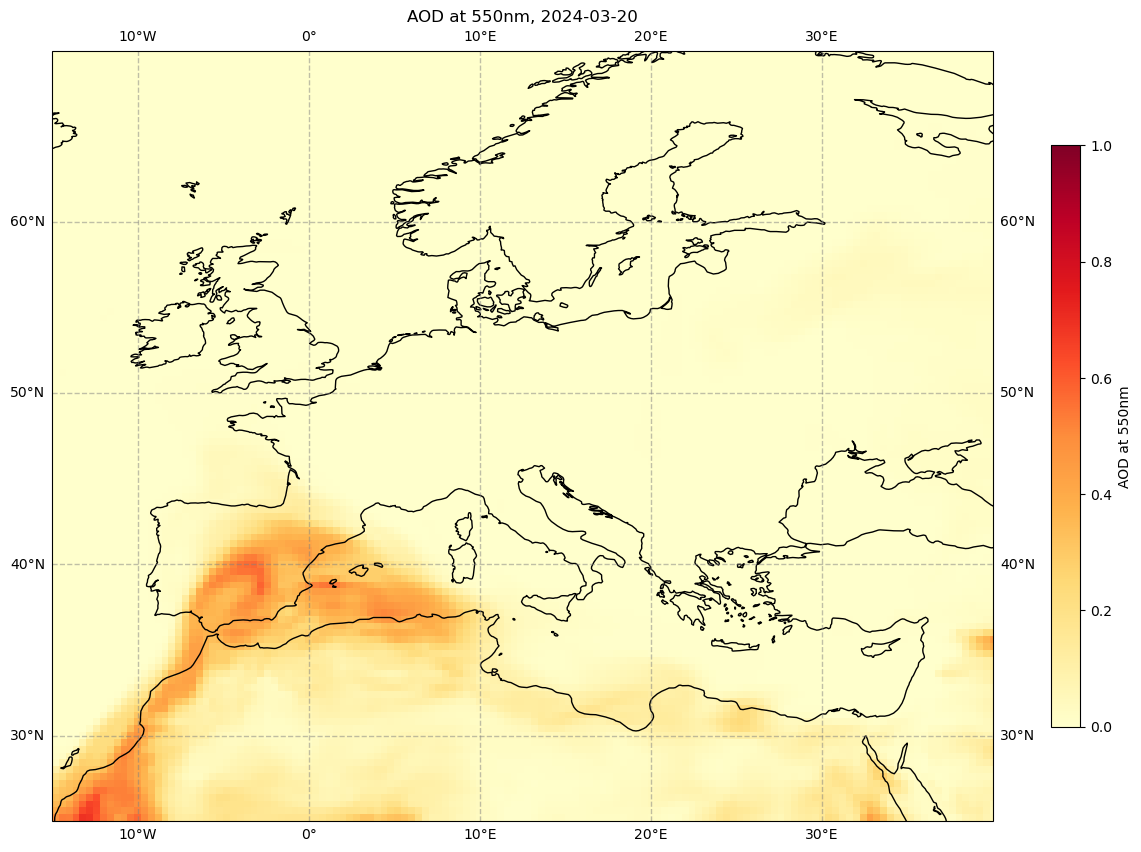

In [24]:
region = 'europe'
maplon = [-15,40]
maplat = [25,70]

lonmin = maplon[0]
lonmax = maplon[1]
latmin = maplat[0]
latmax = maplat[1]

# create the figure panel and specify size
fig = plt.figure(figsize=(15, 10))

# create the map using the cartopy PlateCarree projection
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# make map only of defined region
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())

# Add lat/lon grid
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Set figure title
ax.set_title(f'AOD at 550nm, {forecast_day}', fontsize=12) 

# Plot the data
im = plt.pcolormesh(da.longitude, da.latitude, da[0,time_step,:,:], cmap='YlOrRd', vmin=0, vmax=1) 

# Add coastlines
ax.coastlines(color='black') 

# Specify the colourbar, including fraction of original axes to use for colorbar, 
# and fraction of original axes between colorbar and new image axes
cbar = plt.colorbar(im, fraction=0.025, pad=0.05) 

# Define the colourbar label
cbar.set_label('AOD at 550nm') 

# Save the figure
fig.savefig(f'{DATADIR}/aod-550nm-global.png')

## Plot animation of all forecast steps

### Create initial state

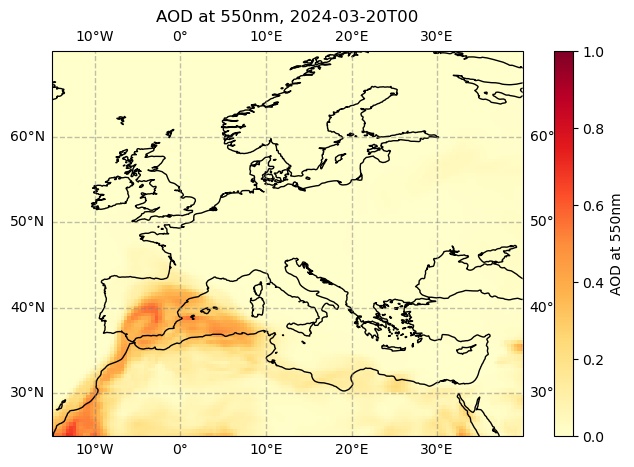

In [25]:
fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
ax.set_title(f'AOD at 550nm, {str(da.forecast_reference_time[0].values)[:-16]}', fontsize=12) # Set figure title
ax.coastlines(color='black') # Add coastlines
im = plt.pcolormesh(da.longitude, da.latitude, da[0,0,:,:], cmap='YlOrRd', vmin=0, vmax=1) # Plot the data
cbar = plt.colorbar(im,fraction=0.046, pad=0.04) # Specify the colourbar
cbar.set_label('AOD at 550nm') # Define the colourbar label

### Set number of frames

In [26]:
frames = 24

### Create a function that will be called by the animation object

In [27]:
def animate(i):
    array = da[0,i,:,:].values
    im.set_array(array.flatten())
    ax.set_title(f'AOD at 550nm, {str(da.forecast_reference_time[i].values)[:-16]}', fontsize=12)

### Create animation object

In [28]:
ani = animation.FuncAnimation(fig, animate, frames, interval=150)

### Display animation

In [29]:
HTML(ani.to_jshtml())

## Plot time series for given latitude and longitude

### Convert longitude to [-180, 180] grid

Notice that the `longitude` variables in the Xarray Dataset and Data Array objects are in the range of `[0, 359.75]`. By default, ECMWF data are on a [0, 360] grid. Should you wish to, there are two options to bring the longitude coordinates to a `[-180, 180]` grid. The first option, in case you already have the data downloaded, is to assign values to coordinates with the xarray function `assign_coords()`. The code below shifts your longitude coordinates from `[0, 359.75]` to `[-180, 179.75]`.

The second option is to specify the `area` keyword argument right when you request data with the `CDS API`. The `area` keyword then automatically reprojects the requested data onto a [-180, 180] grid.

In [30]:
ds_180 = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [31]:
da = ds_180['duaod550']
da

<xarray.DataArray 'duaod550' (forecast_period: 1, forecast_reference_time: 24,
                              latitude: 451, longitude: 900)>
[9741600 values with dtype=float32]
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2024-03...
  * latitude                 (latitude) float64 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude                (longitude) float64 -180.0 -179.6 ... 179.2 179.6
Attributes: (12/34)
    GRIB_paramId:                             210209
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      405900
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    long_name:                                Dust Aerosol Optical Depth at 5...
    units:                                    ~
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0
    coordinates:                              step time latitude longitude va...

### Select location

In [32]:
station_lat = 43.60
station_lon = 1.44

In [33]:
station_da = da.sel(latitude = station_lat, longitude = station_lon, method='nearest')
station_da

<xarray.DataArray 'duaod550' (forecast_period: 1, forecast_reference_time: 24)>
[24 values with dtype=float32]
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2024-03...
    latitude                 float64 43.6
    longitude                float64 1.6
Attributes: (12/34)
    GRIB_paramId:                             210209
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      405900
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    long_name:                                Dust Aerosol Optical Depth at 5...
    units:                                    ~
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0
    coordinates:                              step time latitude longitude va...

### Plot time series

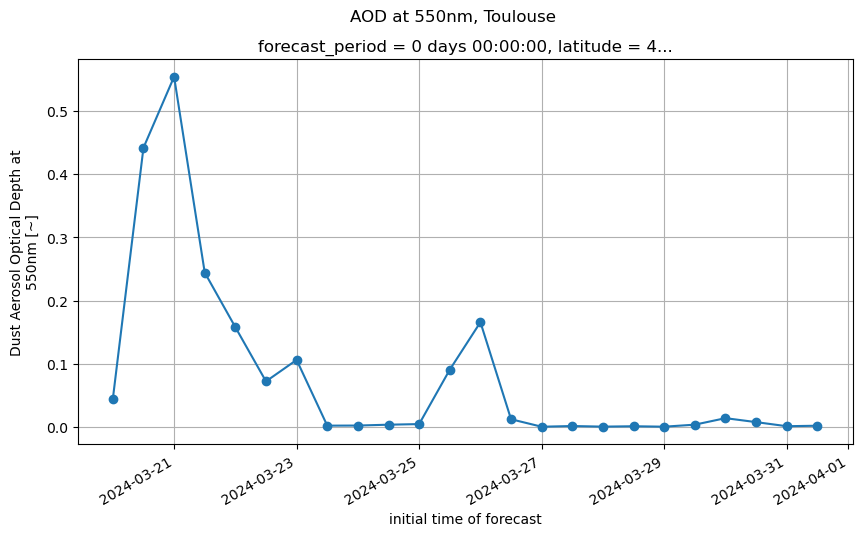

In [34]:
fig = plt.figure(figsize=(10, 5))
station_da.plot(marker='o')
plt.suptitle("AOD at 550nm, Toulouse")
plt.grid(True)

For more analysis of this event, visit https://atmosphere.copernicus.eu/cams-air-boreal-summer-24 and https://atmosphere.copernicus.eu/smoke-canadian-wildfires-reaches-europe.